# Objective

To predict gender based on certain tooth measurements

# Background 

Forensic medicine is an interesting area of study. Forensic dentistry is a branch of forensic medicine. During natural calamities or due to some other reasons, many times, it will not be possible to find out the gender of the deceased person. In such cases, certain measurements of the tooth will be taken (as bones and teeth do not decay easily) and gender will be determined.

# Scope

This project is done on the Indian population.

# Import Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Dataset

In [3]:
df =  pd.read_csv("Dentistry Dataset.csv")


In [5]:
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


##  EDA

In [5]:
df.shape

(1100, 14)

In [7]:
list(df)

['Sl No',
 'Sample ID',
 'Age',
 'Gender',
 'inter canine distance intraoral',
 'intercanine distance casts',
 'right canine width intraoral',
 'right canine width casts',
 'left canine width intraoral',
 'left canine width casts',
 'right canine index intra oral',
 'right canine index casts',
 'left canine index intraoral',
 'left canine index casts']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

### Missing Value Check

In [11]:
df.isnull().sum() 

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Converts 'Female' -> 0, 'Male' -> 1


In [15]:
df = pd.get_dummies(df, drop_first=True)  # Creates dummy variables and removes one to avoid multicollinearity


### Multicollinearity Check

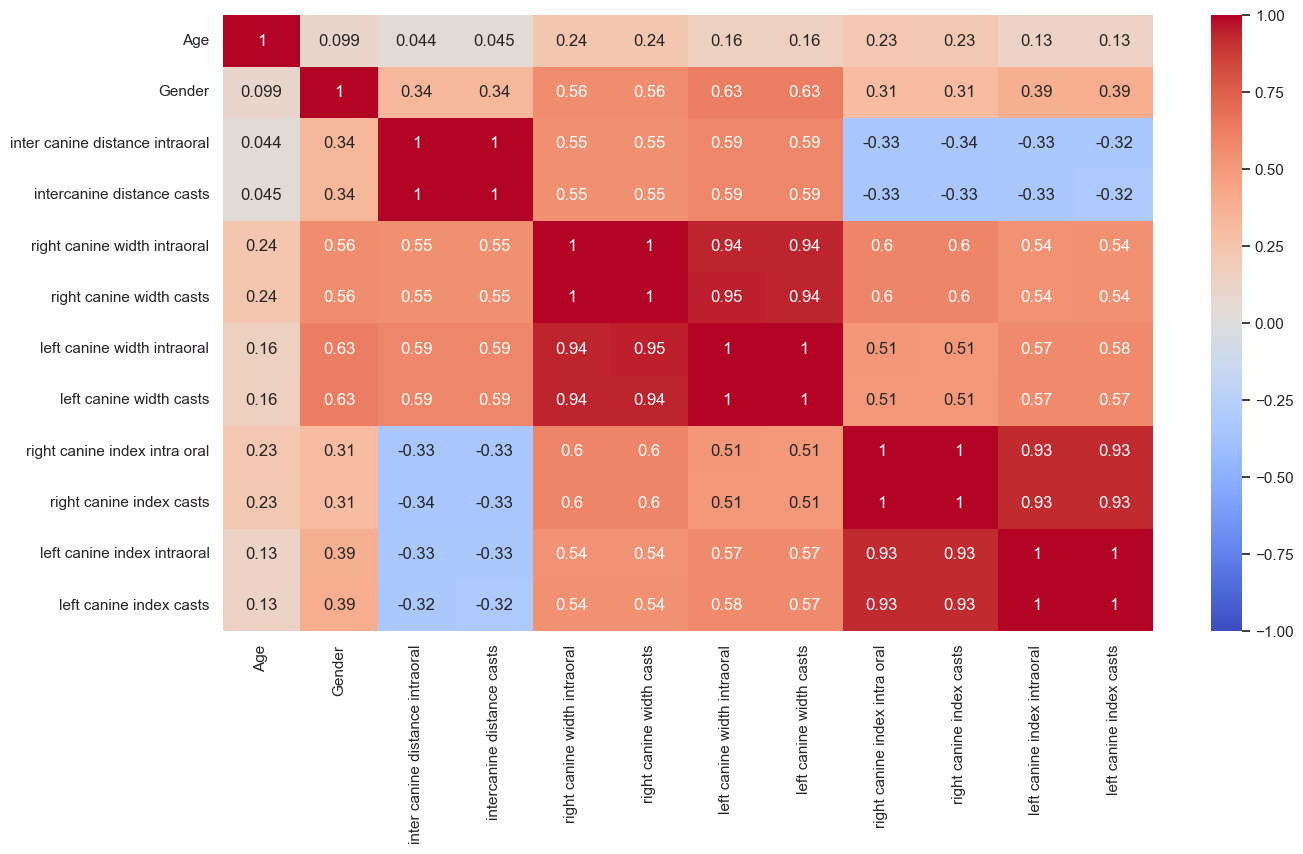

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (15, 8)})
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()


### Scatter Plot Check

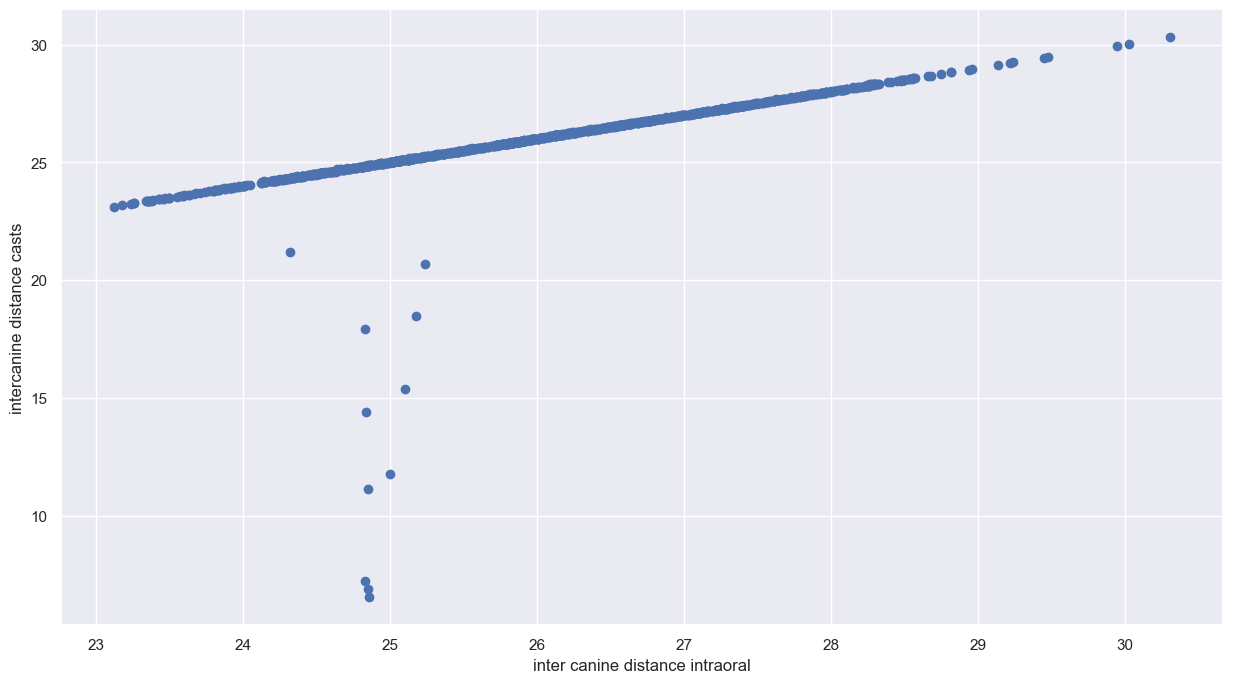

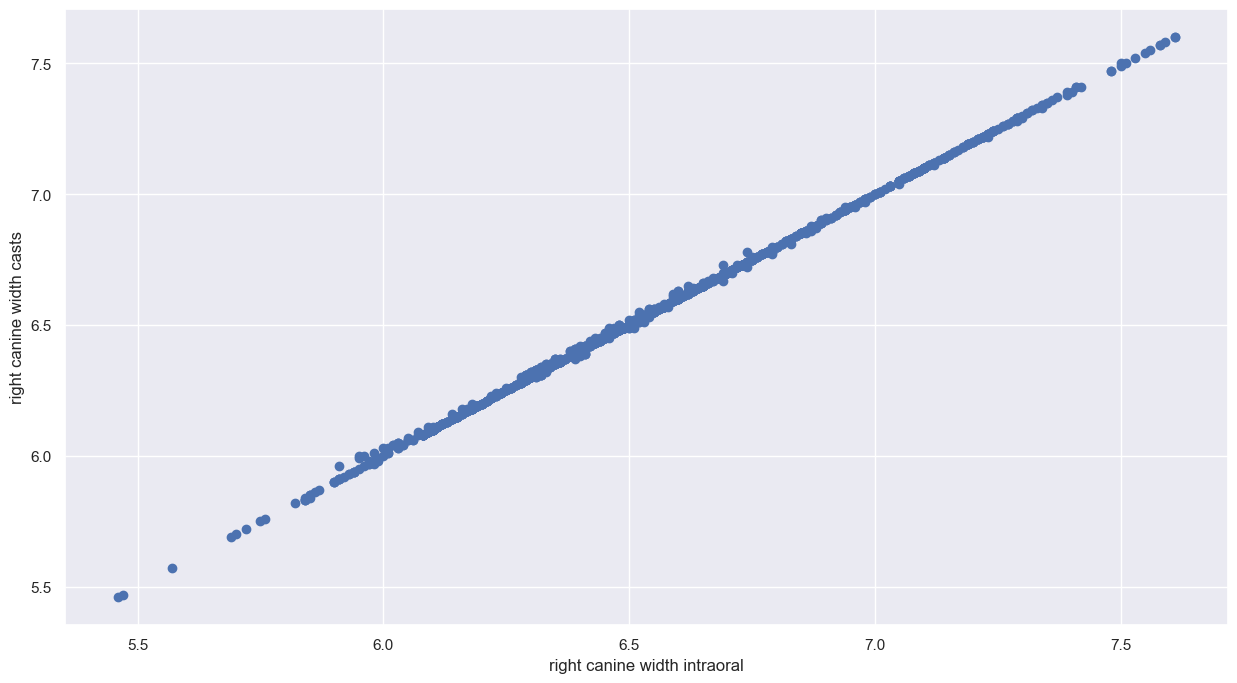

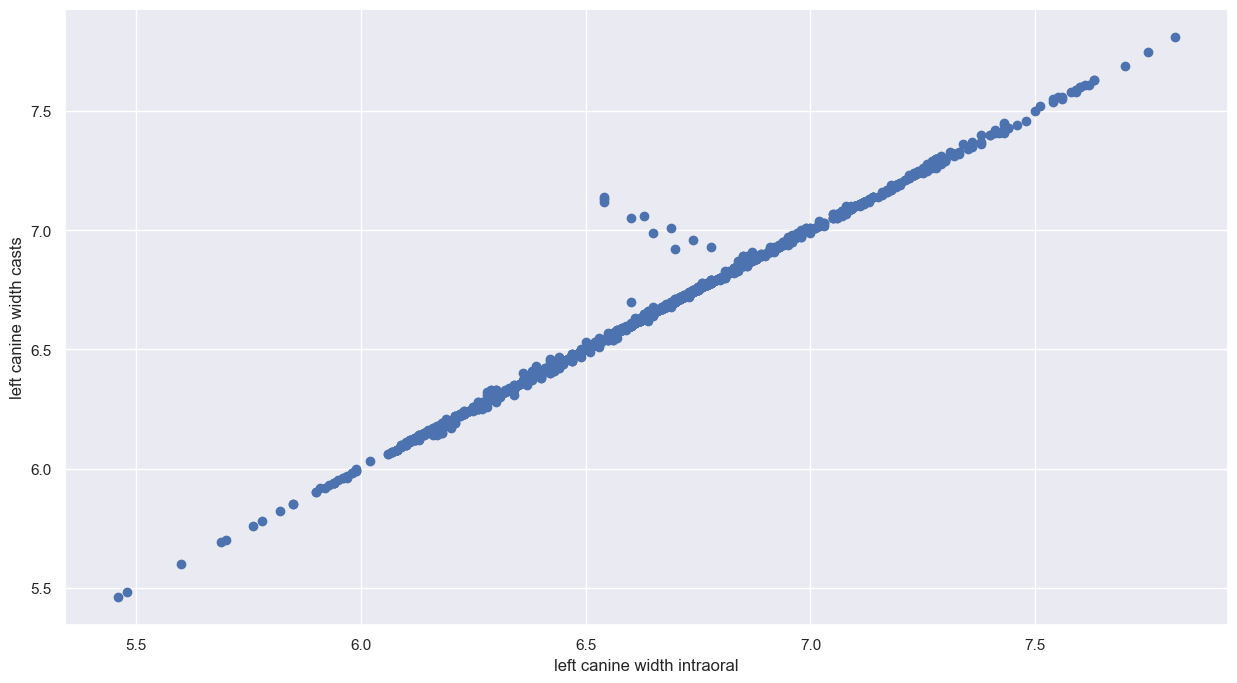

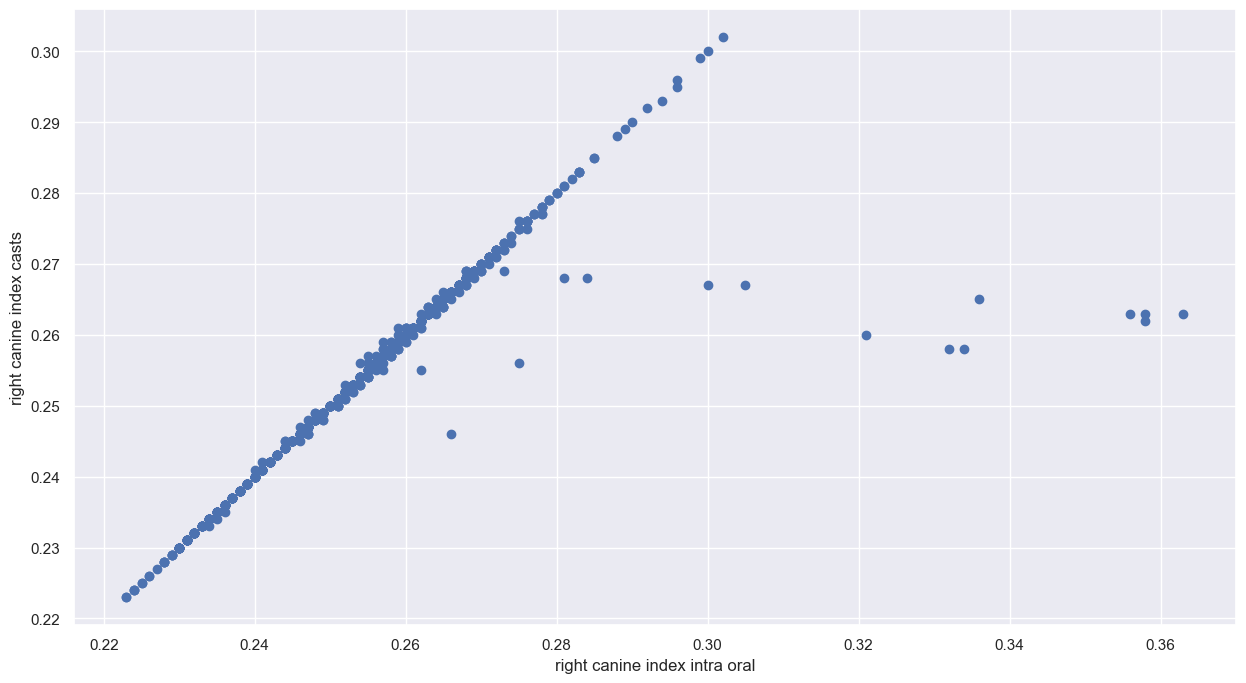

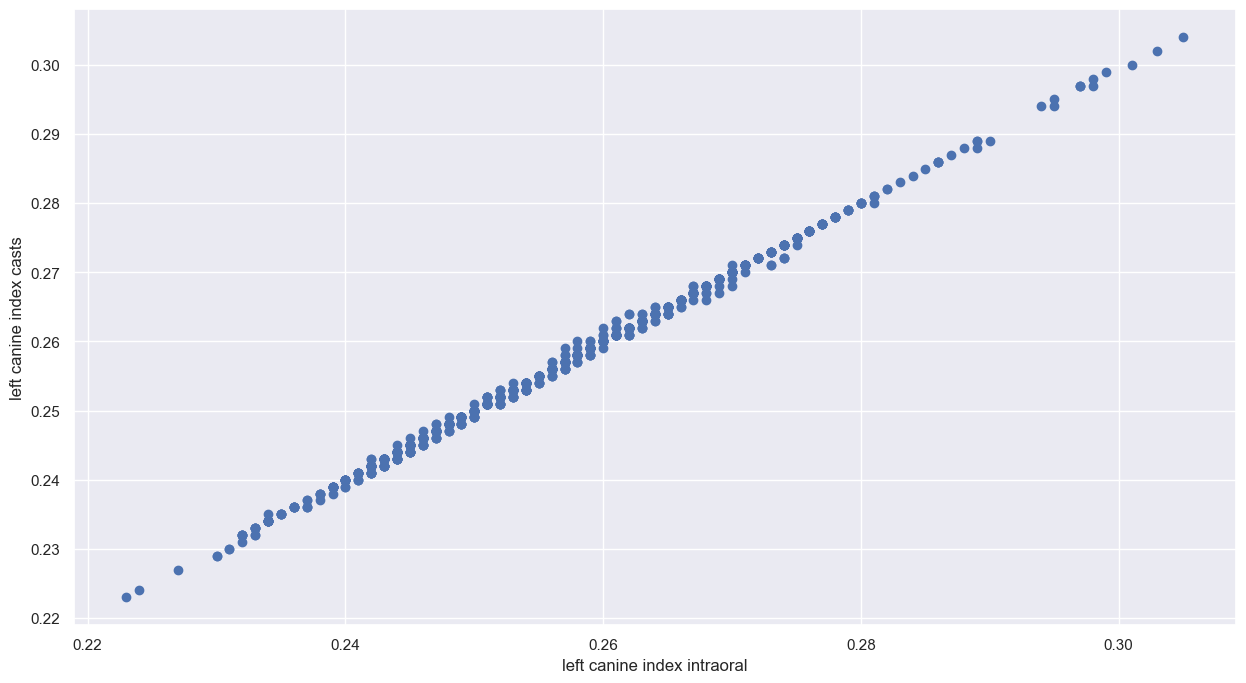

In [23]:
dict={1:'inter canine distance intraoral',2:'intercanine distance casts',3:'right canine width intraoral',4:'right canine width casts',5:'left canine width intraoral',6:'left canine width casts',7:'right canine index intra oral',8:'right canine index casts',9:'left canine index intraoral',10:'left canine index casts'}
i=1
while i < 10 :
      plt.scatter(df[dict[i]],df[dict[i+1]])
      plt.xlabel(dict[i])
      plt.ylabel(dict[i+1])
      plt.show()
      i=i+2


### Comments 

1. Presence of Unnessary Columns (Step Id) ,
2. High Multi Collinearity between the dependent variables (Heat Map) ,
3. Presence of data noise and outliers   as seen in scatter plot ,

# Datset Cleaning 

## Dropping Rows 

1.Rows containing noise data as seen in scatter plot removed

2.Criterion is the difference in values to be minimised 

In [25]:
 df['D1']=df[dict[1]]-df[dict[2]]# Difference in successive columns to be minimised 
 df['D2']=df[dict[3]]-df[dict[4]]
 df['D3']=df[dict[5]]-df[dict[6]]
 df['D4']=df[dict[7]]-df[dict[8]]
 df['D5']=df[dict[9]]-df[dict[10]]

In [27]:

df1=df[(df['D1']<-0.04 )+(df['D1']>0.04 )].index
df.drop(df1,inplace=True)
df2=df[(df['D2']>0.04 )+(df['D2']<-0.04)].index
df.drop(df2,inplace=True)
df3=df[(df['D3']>0.04 )+(df['D3']<-0.04)].index
df.drop(df3,inplace=True)
df4=df[(df['D4']>0.004 )&(df['D4']>0.004)].index
df.drop(df4,inplace=True)
df5=df[(df['D5']>0.004 )+(df['D5']<-0.004)].index
df.drop(df5,inplace=True)



In [29]:
df.shape

(1041, 19)

## Dropping  Columns 

In [31]:
df.drop(['Sl No','Sample ID','D1','D2','D3','D4','D5'],axis=1,inplace=True)

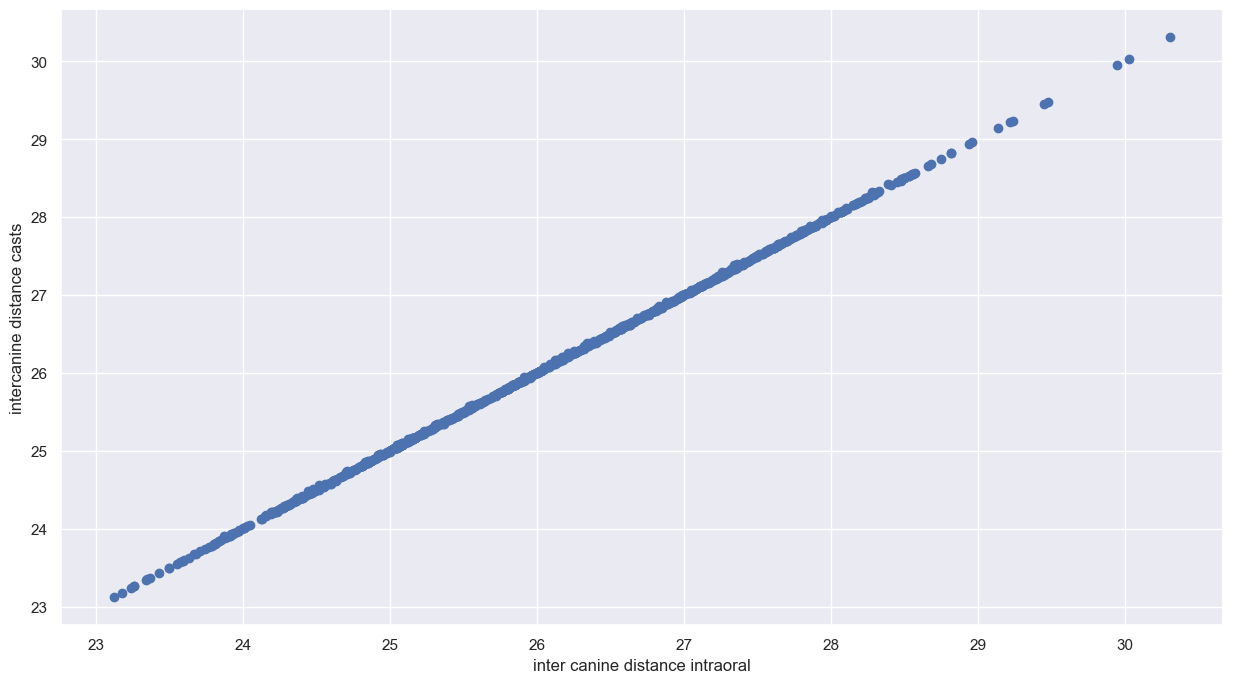

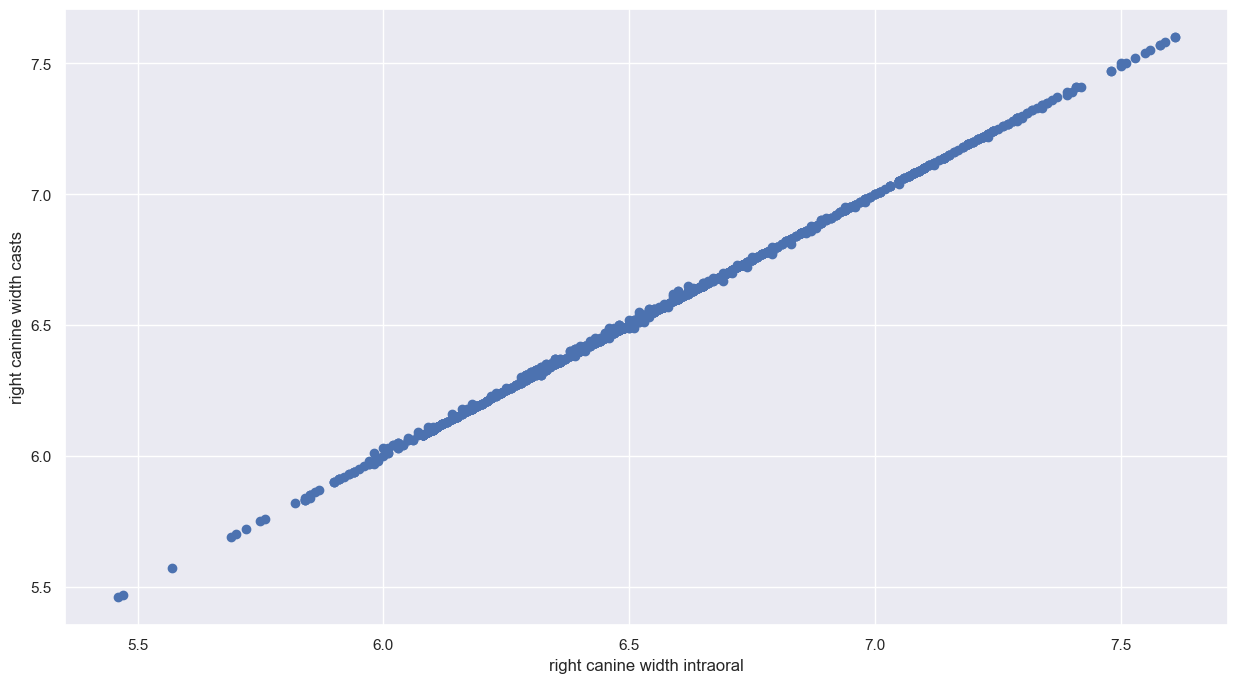

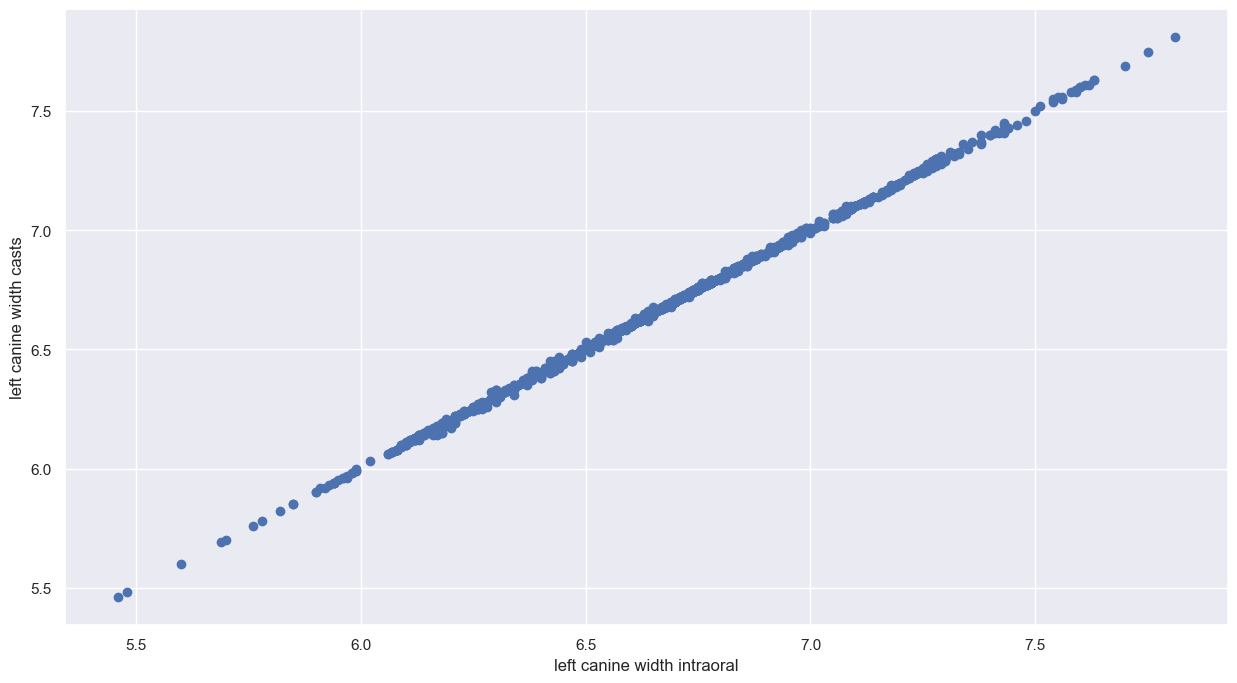

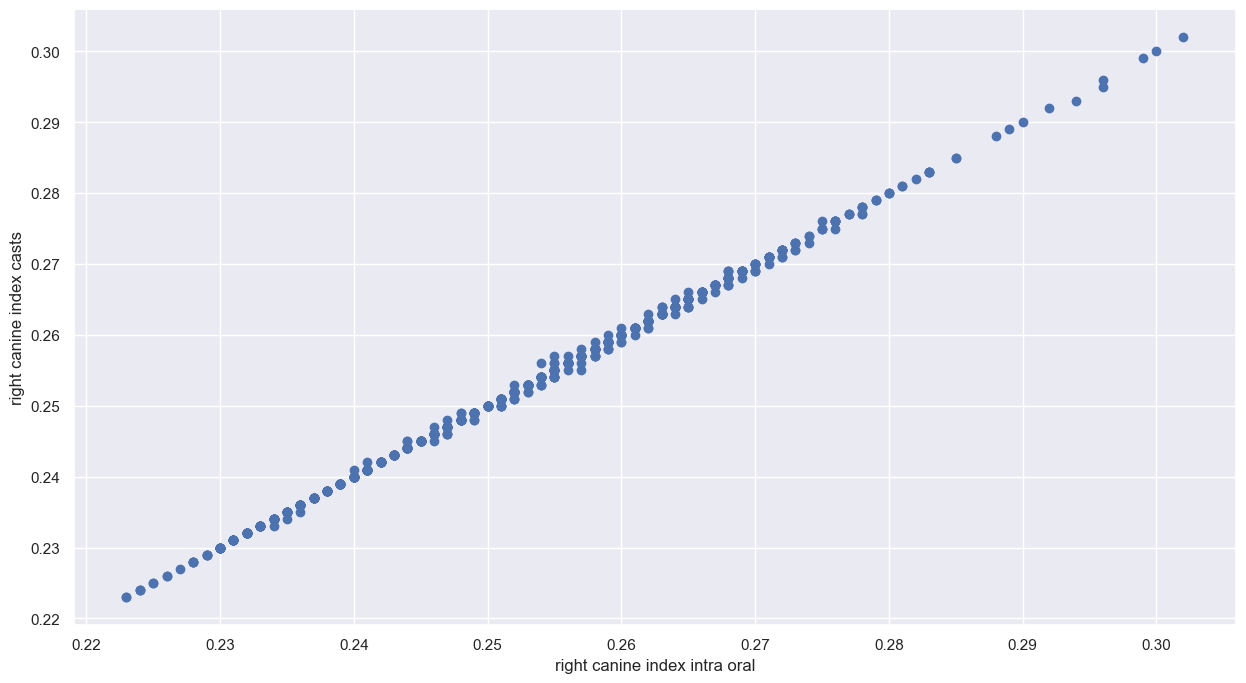

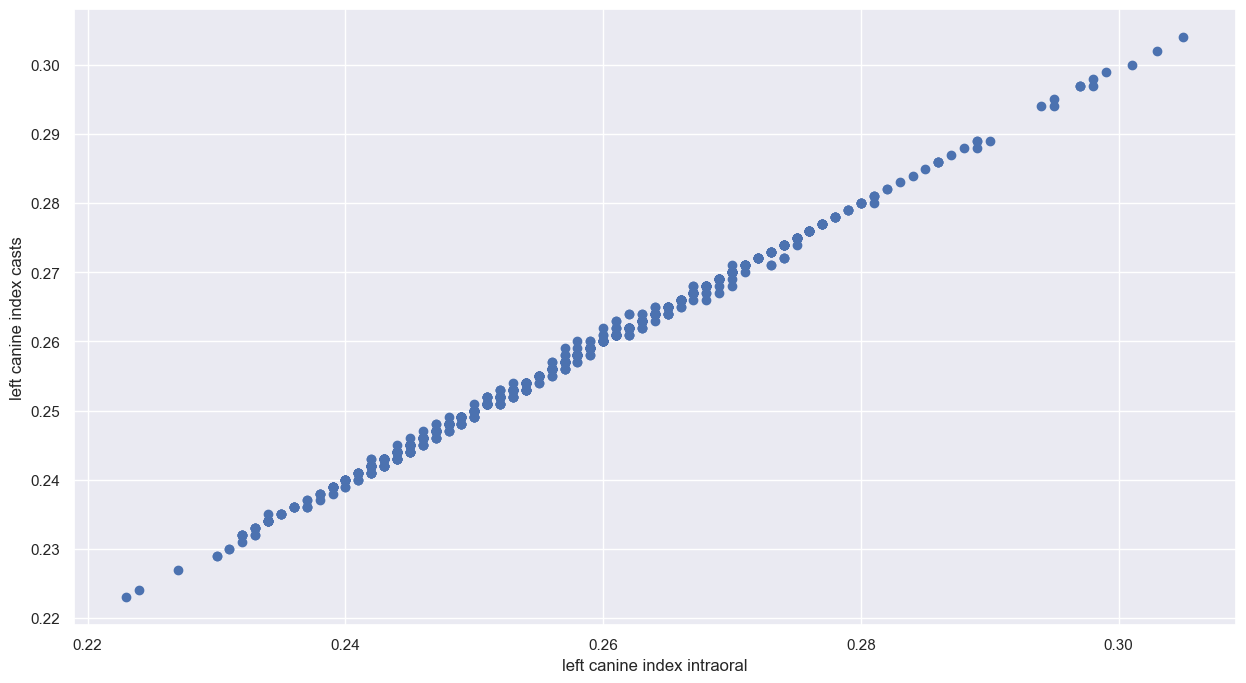

In [33]:
# Scatter Plot after filtering
i=1
while i < 10 :
      plt.scatter(df[dict[i]],df[dict[i+1]])
      plt.xlabel(dict[i])
      plt.ylabel(dict[i+1])
      plt.show()
      i=i+2

In [41]:
sns.countplot(data=df)


<Axes: ylabel='count'>

## Feature Selection

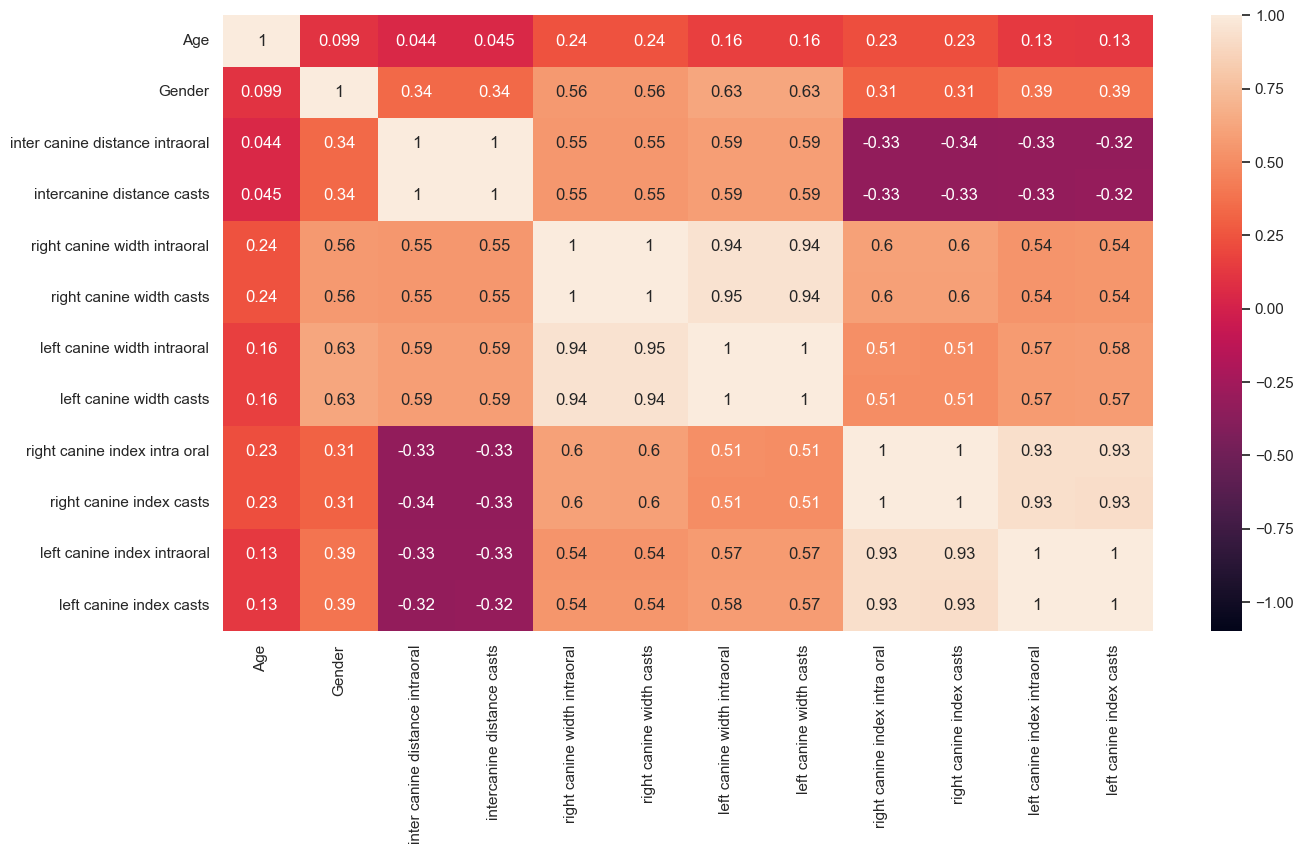

In [43]:
# Multicollinearity Check
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Gender"]= LE.fit_transform(df["Gender"])
Y=df['Gender']
sns.heatmap(df.corr(),annot=True, vmin=1, vmax=-1)# case of high multicollinearity issue among the independent variables 
plt.show()

In [45]:

X=df[['Age','inter canine distance intraoral','right canine width casts','left canine index casts']]#get rid of redundant variables

## Outlier Check

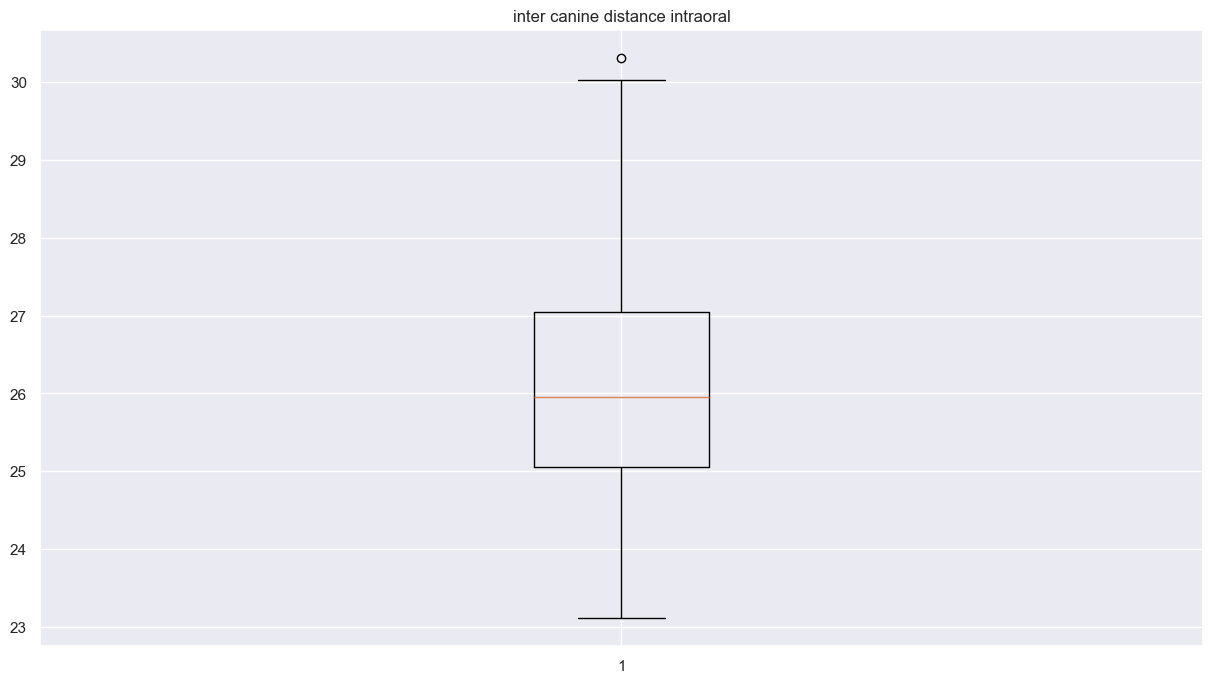

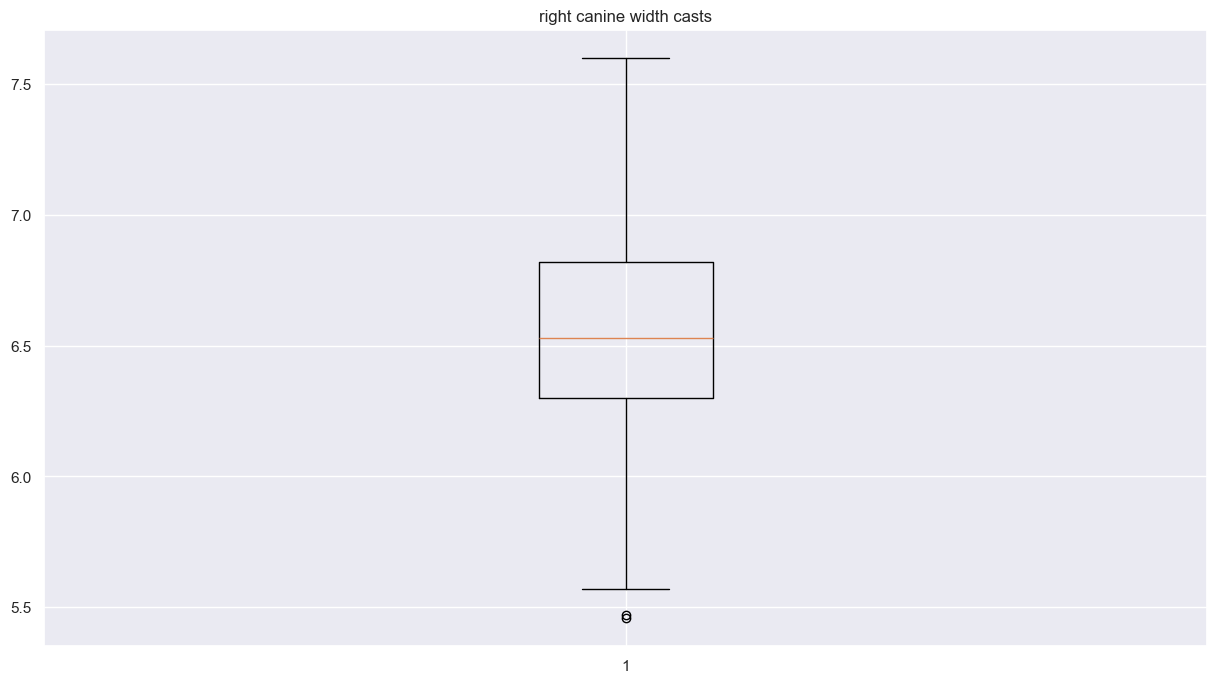

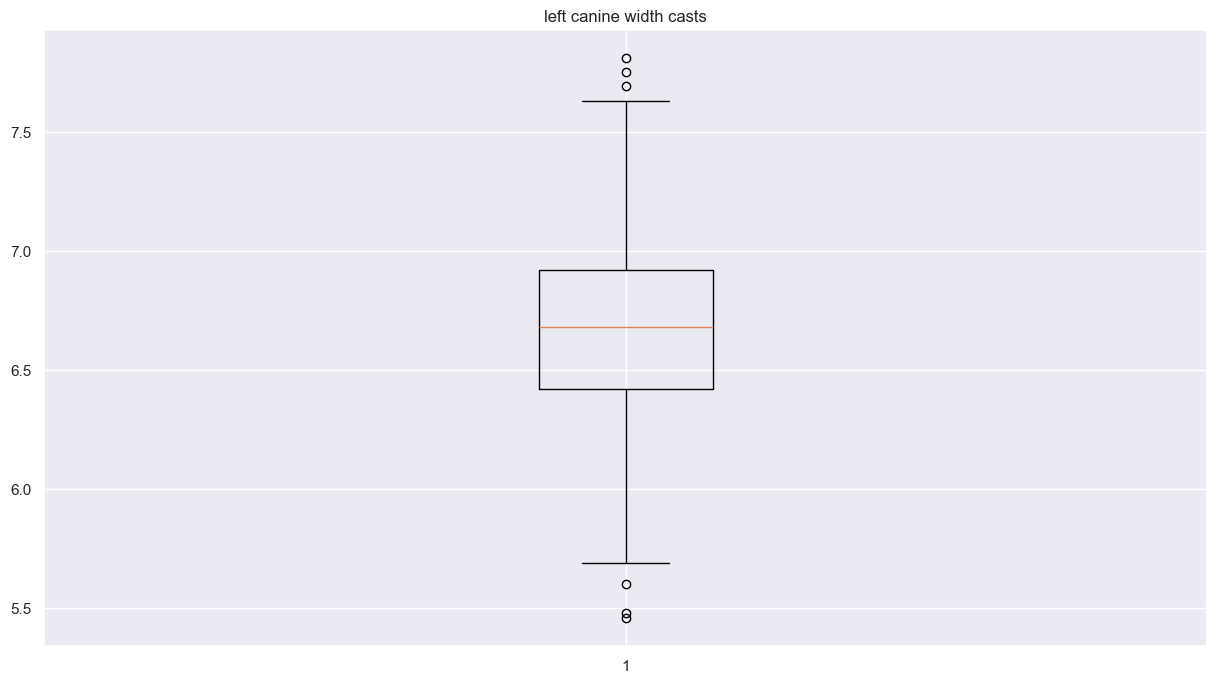

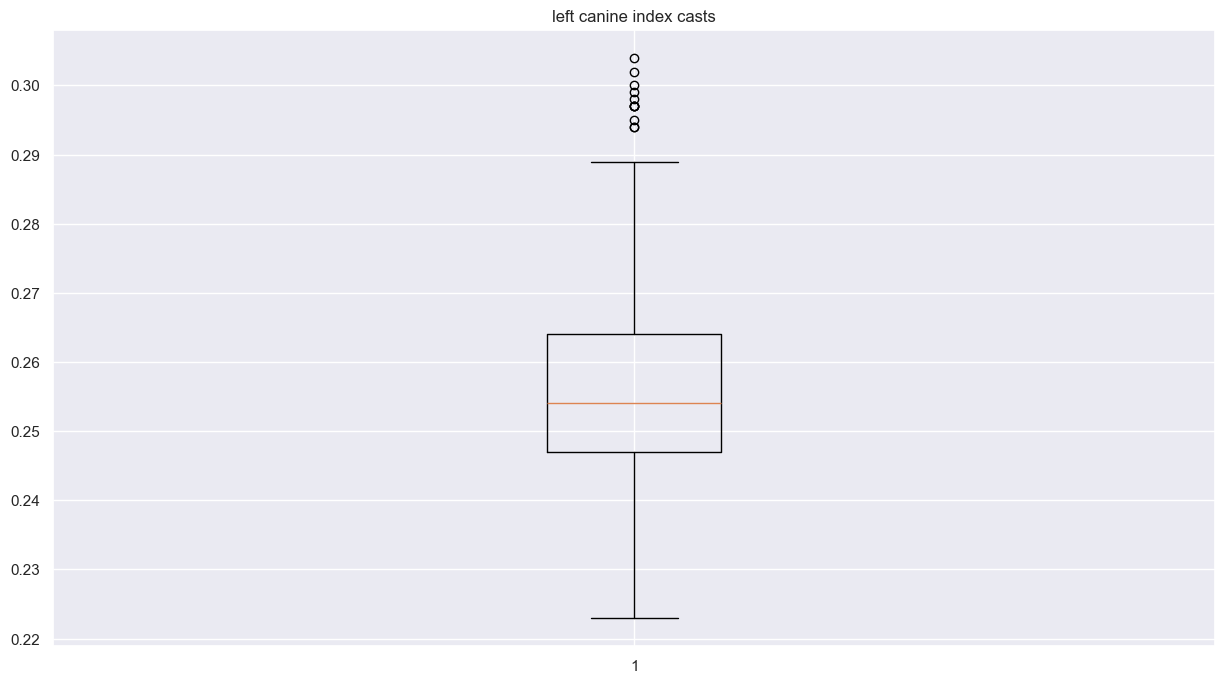

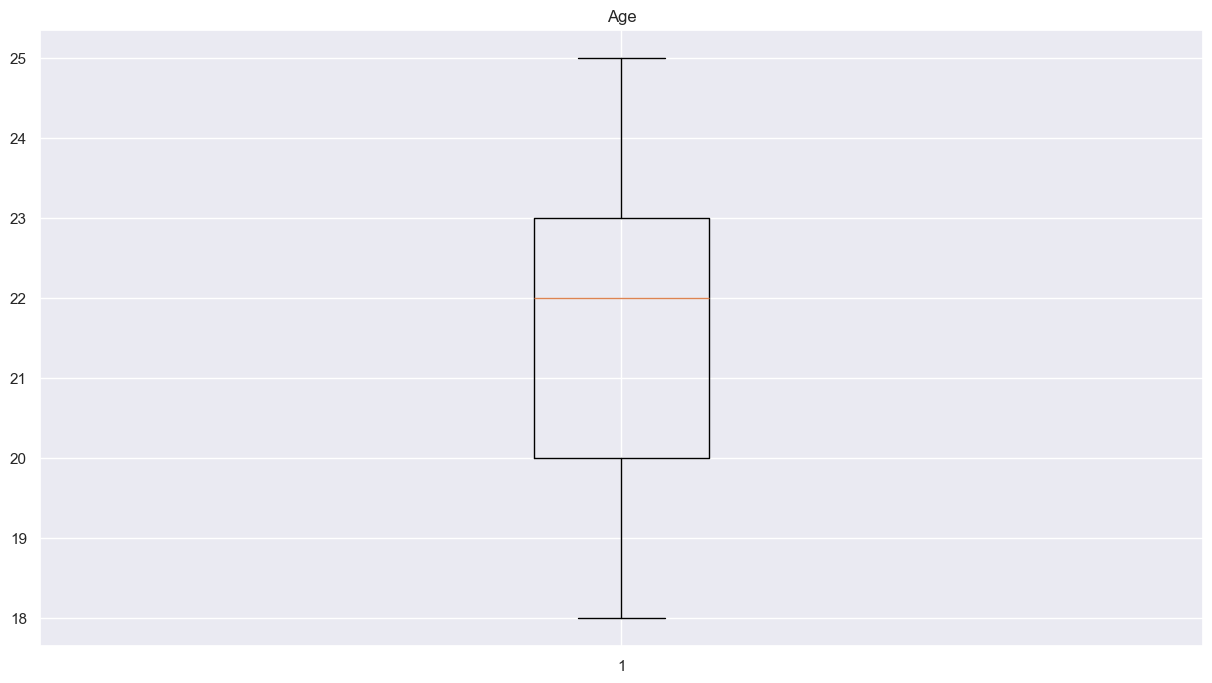

In [47]:
dict={1:'inter canine distance intraoral',2:'right canine width casts',3:'left canine width casts',4:'left canine index casts',5:'Age'}
i=1
while i < 6 :
      plt.boxplot(df[dict[i]])
      plt.title(dict[i])
      plt.show()
      i=i+1


# Modelling 

## Data Transformation

In [51]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Gender"]= LE.fit_transform(df["Gender"])
Y=df['Gender']
X=df[['Age','inter canine distance intraoral','right canine width casts','left canine width casts']]
#X=df[['Age','inter canine distance intraoral','left canine width casts']]

In [53]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_scale = SS.fit_transform(X)


## Data Split

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,train_size=0.70, random_state=47)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((728, 4), (313, 4), (728,), (313,))

In [57]:
pd.crosstab(Y,Y)
pd.crosstab(Y_train,Y_train)
pd.crosstab(Y_test,Y_test)


Gender,0,1
Gender,,
0,153,0
1,0,160


## KNN Model Deployment

In [59]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,25)


#Loop   
for k in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, Y_train)
    training_accuracy.append(clf.score(X_train,Y_train))
    test_accuracy.append(clf.score(X_test, Y_test))

### K value selction

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

For K value 3 to 5 the model shows highest accuracies for both train and test data 

for k between 3 and 5 there is less overfitting or underfitting issue

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred=knn.predict(X_test)
Y_pred1=knn.predict(X_train)


### Performance Parameters

#### Confusion Matrix

In [65]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, Y_pred)
print(cm)

[[142  11]
 [ 19 141]]


#### Test accuracy score 

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score
ac = accuracy_score(Y_test,Y_pred)
ac1 = accuracy_score(Y_train,Y_pred1)
print(" Test Accuracy_score:", (ac*100))

 Test Accuracy_score: 90.41533546325878


#### Train Accuracy Score 

In [77]:
ac1 = accuracy_score(Y_train,Y_pred1)
print(" Train Accuracy_score:", (ac1*100))

 Train Accuracy_score: 94.64285714285714


#### Specificity Score 

In [79]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
TNR =  TN/(TN + FP)
print("Specificity_score:", (TNR*100))

Specificity_score: 92.81045751633987


#### Sensitivity Score 

In [81]:
from sklearn.metrics import recall_score
rc = recall_score(Y_test,Y_pred)
print("Sensitivity_score:", (rc*100))

Sensitivity_score: 88.125


#### Precision Score 

In [83]:
from sklearn.metrics import precision_score
pc = precision_score(Y_test,Y_pred)
print("Precision_score:", (pc*100))


Precision_score: 92.76315789473685


#### F1 Score

In [85]:
from sklearn.metrics import f1_score
f1sc = f1_score(Y_test,Y_pred)
print("F1 score:", (f1sc*100))


F1 score: 90.38461538461539


#### Summary

In [87]:
Per={1:['Accuracy Score_test',ac],2:['Accuracy Score_train',ac1],3:['Specificity Score',TNR],4:['Sensitivity Score',rc],5:['Precision Score',pc],6:['F1 Score',f1sc]}
i=1
while i<7:
    print(Per[i])
    i=i+1

['Accuracy Score_test', 0.9041533546325878]
['Accuracy Score_train', 0.9464285714285714]
['Specificity Score', 0.9281045751633987]
['Sensitivity Score', 0.88125]
['Precision Score', 0.9276315789473685]
['F1 Score', 0.9038461538461539]


### Cross Validation Score 

In [89]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

loocv = LeaveOneOut()
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=loocv, scoring='accuracy')

results.mean()*100.0

85.20653218059559

## Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()
LG.fit(X_train,Y_train)
Y_pred = LG.predict(X_test)
Y_pred1=LG.predict(X_train)

In [97]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
cm = confusion_matrix(Y_test, Y_pred)
ac = accuracy_score(Y_test,Y_pred)
ac1 = accuracy_score(Y_train,Y_pred1)
rc = recall_score(Y_test,Y_pred)
pc = precision_score(Y_test,Y_pred)
f1sc = f1_score(Y_test,Y_pred)
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
TNR =  TN/(TN + FP)

### Perfromance Score 

In [99]:
Per={1:['Accuracy Score_test',ac],2:['Accuracy Score_train',ac1],3:['Specificity Score',TNR],4:['Sensitivity Score',rc],5:['Precision Score',pc],6:['F1 Score',f1sc]}
i=1
while i<7:
    print(Per[i])
    i=i+1

['Accuracy Score_test', 0.8210862619808307]
['Accuracy Score_train', 0.804945054945055]
['Specificity Score', 0.8366013071895425]
['Sensitivity Score', 0.80625]
['Precision Score', 0.8376623376623377]
['F1 Score', 0.821656050955414]


### Cross Validation Score 

In [101]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

loocv = LeaveOneOut()
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=loocv, scoring='accuracy')

results.mean()*100.0

85.20653218059559

## AdaBoost 

### Model Tuning 

In [103]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model=AdaBoostClassifier()
grid = {'n_estimators':[10, 50, 100, 500],'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X, Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print(grid)

C:\Users\Eduonix\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best: 0.816520 using {'learning_rate': 1.0, 'n_estimators': 500}
{'n_estimators': [10, 50, 100, 500], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}


### Hyperparameter Selection

In [105]:
from sklearn.ensemble import AdaBoostClassifier
Ada=AdaBoostClassifier(n_estimators=500,learning_rate=1)
Ada.fit(X_train, Y_train)
Y_pred=Ada.predict(X_test)
Y_pred1=Ada.predict(X_train)

C:\Users\Eduonix\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### Model Performance 

In [107]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
ac = accuracy_score(Y_test,Y_pred)
ac1 = accuracy_score(Y_train,Y_pred1)
rc = recall_score(Y_test,Y_pred)
pc = precision_score(Y_test,Y_pred)
f1sc = f1_score(Y_test,Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
TNR =  TN/(TN + FP)


In [109]:
Per={1:['Accuracy Score_test',ac],2:['Accuracy Score_train',ac1],3:['Specificity Score',TNR],4:['Sensitivity Score',rc],5:['Precision Score',pc],6:['F1 Score',f1sc]}
i=1
while i<7:
    print(Per[i])
    i=i+1

['Accuracy Score_test', 0.805111821086262]
['Accuracy Score_train', 0.9175824175824175]
['Specificity Score', 0.7843137254901961]
['Sensitivity Score', 0.825]
['Precision Score', 0.8]
['F1 Score', 0.8123076923076923]


In [116]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Load sample dataset
data = load_iris()
X, Y = data.data, data.target

# Define LOOCV
loocv = LeaveOneOut()

# Define model
model = AdaBoostClassifier()

# Perform LOOCV
results = cross_val_score(model, X, Y, cv=loocv, scoring='accuracy')

# Print mean accuracy
print(f"Mean Accuracy: {results.mean() * 100:.2f}%")


Mean Accuracy: 95.33%


## SVM Model

### Paramater Selection

In [118]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model=SVC()
grid = {'gamma':['auto'],'C':[2,5,10,25],'kernel':['rbf']}
#grid = {'gamma':['auto'],'C':[1,1.5],'kernel':['linear']}
#grid = {'gamma':['auto'],'C':[2,2.5],'kernel':['poly']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X, Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.975556 using {'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}


### Model Performance 

In [120]:
clf = SVC(gamma='auto',C=25,kernel='rbf')
clf = SVC()
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)
y_pred1=clf.predict(X_train)
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
ac = accuracy_score(Y_test,y_pred)
ac1 = accuracy_score(Y_train,y_pred1)
rc = recall_score(Y_test,y_pred)
pc = precision_score(Y_test,y_pred)
f1sc = f1_score(Y_test,y_pred)
cm = confusion_matrix(Y_test, y_pred)
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
TNR =  TN/(TN + FP)
Per={1:['Accuracy Score_test',ac],2:['Accuracy Score_train',ac1],3:['Specificity Score',TNR],4:['Sensitivity Score',rc],5:['Precision Score',pc],6:['F1 Score',f1sc]}
i=1
while i<7:
    print(Per[i])
    i=i+1

['Accuracy Score_test', 0.8370607028753994]
['Accuracy Score_train', 0.8282967032967034]
['Specificity Score', 0.8431372549019608]
['Sensitivity Score', 0.83125]
['Precision Score', 0.8471337579617835]
['F1 Score', 0.8391167192429022]


In [126]:
pip install xgboost



   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 6.7 MB/s eta 0:00:23
    --------------------------------------- 2.4/150.0 MB 5.6 MB/s eta 0:00:27
    --------------------------------------- 3.4/150.0 MB 5.6 MB/s eta 0:00:27
   - -------------------------------------- 4.2/150.0 MB 5.0 MB/s eta 0:00:29
   - -------------------------------------- 5.8/150.0 MB 5.4 MB/s eta 0:00:27
   - -------------------------------------- 7.3/150.0 MB 5.8 MB/s eta 0:00:25
   -- ------------------------------------- 7.9/150.0 MB 5.9 MB/s eta 0:00:25
   -- ------------------------------------- 7.9/150.0 MB 5.9 MB/s eta 0:00:25
   -- ------------------------------------- 8.4/150.0 MB 4.4 MB/s eta 0:00:32
   -- ------------------------------------- 9.7/150.0 MB 4.5 MB/s eta 0:00:32
   -- ------------------------------------- 11.0/150.0 MB 4.7 MB/s eta 0:00:30
   --- ------------------------------------ 11.8/150.0 MB 4.6 MB/s et

## XGBoost Model

In [128]:
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model=XGBClassifier()
grid = {'gamma':[2],'reg_lambda':[4],'eta':[.01,.03,.04,.05]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X, Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.951111 using {'eta': 0.04, 'gamma': 2, 'reg_lambda': 4}


### Parameter Selction

In [130]:
from xgboost import XGBClassifier
XGBc = XGBClassifier(eta=0.04,gamma=2,reg_lambda=4)# Parameter Selcted 
XGBc.fit(X_train,Y_train)
y_pred=XGBc.predict(X_test)
y_pred1=XGBc.predict(X_train)

### Model Performance 

In [132]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
ac = accuracy_score(Y_test,y_pred)
ac1 = accuracy_score(Y_train,y_pred1)
rc = recall_score(Y_test,y_pred)
pc = precision_score(Y_test,y_pred)
f1sc = f1_score(Y_test,y_pred)
cm = confusion_matrix(Y_test, y_pred)
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
TNR =  TN/(TN + FP)
Per={1:['Accuracy Score_test',ac],2:['Accuracy Score_train',ac1],3:['Specificity Score',TNR],4:['Sensitivity Score',rc],5:['Precision Score',pc],6:['F1 Score',f1sc]}
i=1
while i<7:
    print(Per[i])
    i=i+1

['Accuracy Score_test', 0.8402555910543131]
['Accuracy Score_train', 0.9038461538461539]
['Specificity Score', 0.7908496732026143]
['Sensitivity Score', 0.8875]
['Precision Score', 0.8160919540229885]
['F1 Score', 0.8502994011976048]


# Summary & Conclusion

1. Overall almost all models provide good fit and perfroamnce .
2. XGBoost and KNN models though perfrom the best and can be used for the use  case of forensic evaluation